# random forest models

In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the presplit data
X_train = pd.read_csv('data/X_train.csv', index_col='id')
X_test = pd.read_csv('data/X_test.csv', index_col='id')
y_train = pd.read_csv('data/y_train.csv', index_col='id')
y_test = pd.read_csv('data/y_test.csv', index_col='id')

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40095 entries, 58975 to 23269
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gps_height         40095 non-null  int64  
 1   installer          40095 non-null  object 
 2   longitude          40095 non-null  float64
 3   latitude           40095 non-null  float64
 4   num_private        40095 non-null  int64  
 5   basin              40095 non-null  object 
 6   region             40095 non-null  object 
 7   region_code        40095 non-null  int64  
 8   district_code      40095 non-null  int64  
 9   population         40095 non-null  int64  
 10  public_meeting     40095 non-null  object 
 11  scheme_management  40095 non-null  object 
 12  permit             40095 non-null  object 
 13  construction_year  40095 non-null  int64  
 14  extraction_type    40095 non-null  object 
 15  management         40095 non-null  object 
 16  payment           

In [4]:
# This function will taken in a given model, X_test, y_test and return the accuracy for each type of well status
def model_predictions(model, X=X_test, y=y_test):
    y_pred = model.predict(X)
    cm = confusion_matrix(y_test, y_pred)
    func = cm[0][0] / (cm[0][0] + cm[0][1] + cm[0][2])
    func_nr = cm[1][1] / (cm[1][0] + cm[1][1] + cm[1][2])
    non_func = cm[2][2] / (cm[2][0] + cm[2][1] + cm[2][2])
    print(f'The model correctly predicts {round(func*100, 2)}% of the funtional wells.')
    print(f'The model correctly predicts {round(func_nr*100, 2)}% of the funtional-needs-repair wells.')
    print(f'The model correctly predicts {round(non_func*100, 2)}% of the non-functional wells.')

In [5]:
y_train = np.array(y_train)
# reshape y_train to an array
y_train = y_train.reshape(40095, )

In [6]:
y_test = np.array(y_test)
# reshape y_test to an array
y_test = y_test.reshape(13365, )

# first model of rfc

* In this model I only used numeric data to see if there was any trends

In [7]:
pipeline_0 = imbPipeline([('ss', StandardScaler()), ('smote', SMOTE(random_state=42)), ('rfc', RandomForestClassifier())])

X_train_nums = X_train.select_dtypes(exclude=object)
X_test_nums = X_test.select_dtypes(exclude=object)

In [8]:
pipeline_0.fit(X_train_nums, y_train)

preds = pipeline_0.predict(X_test_nums)

In [9]:
train_scores = pipeline_0.score(X_train_nums, y_train)
test_scores = pipeline_0.score(X_test_nums, y_test)
print('The Mode\'s accuracy on the training data is', round(train_scores, 4))
print('The Model\'s accuracy on the test data is', round(test_scores, 4))

The Mode's accuracy on the training data is 0.9816
The Model's accuracy on the test data is 0.6777


In [10]:
log_loss_rfc = cross_val_score(pipeline_0, X_train_nums, y_train, scoring='neg_log_loss', n_jobs = -2, cv = 2)
log_loss_rfc = -log_loss_rfc.mean()
print('Log Loss:', log_loss_rfc)

Log Loss: 1.16549643728395


In [11]:
log_loss_rfc = cross_val_score(pipeline_0, X_test_nums, y_test, scoring='neg_log_loss', n_jobs = -2, cv = 2)
log_loss_rfc = -log_loss_rfc.mean()
print('Log Loss:', log_loss_rfc)

Log Loss: 1.2730952887911073


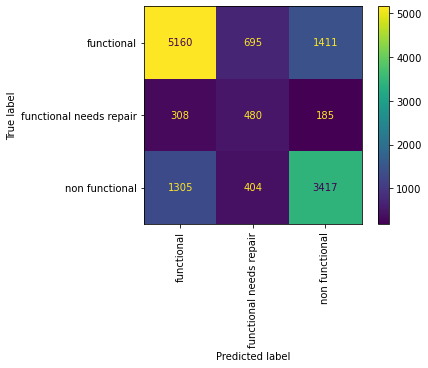

In [12]:
plot_confusion_matrix(pipeline_0, X_test_nums, y_test, xticks_rotation='vertical');

In [13]:
model_predictions(pipeline_0, X_test_nums, y_test)

The model correctly predicts 71.02% of the funtional wells.
The model correctly predicts 49.33% of the funtional-needs-repair wells.
The model correctly predicts 66.66% of the non-functional wells.


*  this inital model that only contains numerical data is severly overfitting the data. the next model will need to tune some hyperparameters to reduce the gap between the training and testing data. our log loss has been decreased from the dummy classifer, but there is still room for improvement. the total score of non-functional and functional needs repairs is only 91.96%, which is very low.

### tuning some hyperparameters to see if the model can be improved

*  no categorial colums have yet been introduced. But I will run a randomized search to see if tuning some hyperparamters will improve the model.

In [14]:
pipline_1 = imbPipeline([('ss', StandardScaler()), ('smote', SMOTE(random_state=42)), ('rfc', RandomForestClassifier())])

In [15]:
pipline_1.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('smote', SMOTE(random_state=42)),
  ('rfc', RandomForestClassifier())],
 'verbose': False,
 'ss': StandardScaler(),
 'smote': SMOTE(random_state=42),
 'rfc': RandomForestClassifier(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': 42,
 'smote__sampling_strategy': 'auto',
 'rfc__bootstrap': True,
 'rfc__ccp_alpha': 0.0,
 'rfc__class_weight': None,
 'rfc__criterion': 'gini',
 'rfc__max_depth': None,
 'rfc__max_features': 'auto',
 'rfc__max_leaf_nodes': None,
 'rfc__max_samples': None,
 'rfc__min_impurity_decrease': 0.0,
 'rfc__min_impurity_split': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 2,
 'rfc__min_weight_fraction_leaf': 0.0,
 'rfc__n_estimators': 100,
 'rfc__n_jobs': None,
 'rfc__oob_score': False,
 'rfc__random_state': None,
 'rfc__verbose': 0,
 'rfc__warm_start': False}

In [16]:
params_1 = {
    'rfc__max_depth': list(range(5,50,5)),
    'rfc__min_samples_leaf': list(range(5,50,5)),
    'rfc__n_estimators': list(range(25,500,25)),
}

In [17]:
rs_1 = RandomizedSearchCV(pipline_1, params_1, n_jobs=-2, verbose=3, n_iter=10)

rs_1.fit(X_train_nums, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('smote', SMOTE(random_state=42)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_jobs=-2,
                   param_distributions={'rfc__max_depth': [5, 10, 15, 20, 25,
                                                           30, 35, 40, 45],
                                        'rfc__min_samples_leaf': [5, 10, 15, 20,
                                                                  25, 30, 35,
                                                                  40, 45],
                                        'rfc__n_estimators': [25, 50, 75, 100,
                                                              125, 150, 175,
                                                              200, 225, 250,
                                                              275, 300

In [18]:
print('The train score for the random search with some hyperparameter tuning is',
      round(rs_1.score(X_train_nums, y_train), 4))
print('')
print('The test score for the random search with some hyperparameter tuning is',
      round(rs_1.score(X_test_nums, y_test), 4))

The train score for the random search with some hyperparameter tuning is 0.7068

The test score for the random search with some hyperparameter tuning is 0.631


In [19]:
rs_1.best_params_

{'rfc__n_estimators': 50, 'rfc__min_samples_leaf': 5, 'rfc__max_depth': 15}

In [20]:
log_loss_rfc = cross_val_score(rs_1, X_train_nums_scaled, y_train, scoring='neg_log_loss', n_jobs = -2, verbose=1, cv = 2)
log_loss_rfc = -log_loss_rfc.mean()
print('Log Loss:', log_loss_rfc)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Log Loss: 0.7866014680117359


[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:  2.7min finished


In [21]:
log_loss_rfc = cross_val_score(rs_1, X_test_nums_scaled, y_test, scoring='neg_log_loss', n_jobs = -2, verbose=1, cv = 2)
log_loss_rfc = -log_loss_rfc.mean()
print('Log Loss:', log_loss_rfc)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Log Loss: 0.827434644865076


[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:  1.3min finished


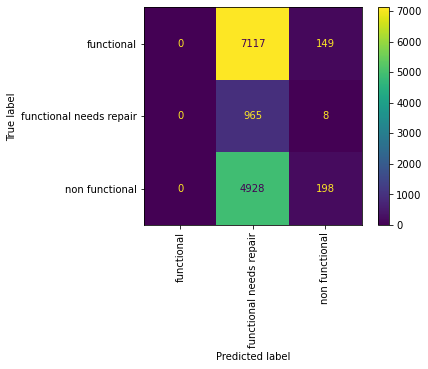

In [22]:
plot_confusion_matrix(rs_1, X_test_nums_scaled, y_test, xticks_rotation='vertical');

In [23]:
model_predictions(rs_1, X_test_nums_scaled, y_test)

The model correctly predicts 0.0% of the funtional wells.
The model correctly predicts 99.18% of the funtional-needs-repair wells.
The model correctly predicts 3.86% of the non-functional wells.


*  this model is very inaccurate. It is unable to predict any functional or non functional wells.

# introduction of categorial features

# model 1

*  this is he first model that will contain the categorical colums, there will be no hyperparameter tuning done yet. 

In [24]:
X_train_nums = X_train.select_dtypes(exclude = object)

X_train_cat = X_train.select_dtypes('object')

In [25]:
numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'))
])


In [26]:
trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
], verbose=True, n_jobs=-1)

In [27]:
model_pipe = imbPipeline(steps=[
    ('trans', trans),
    ('smote', SMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(verbose=1, n_jobs=-2))
])

In [28]:
model_pipe.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:   42.0s finished


Pipeline(steps=[('trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['gps_height', 'longitude', 'latitude', 'num_private', 'region_code',
       'district_code', 'population', 'construction_year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['installer', 'basin', 'region', 'public_meeting', 'scheme_management',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoin

In [29]:
model_pipe.score(X_train, y_train)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.2s finished


0.9945878538471131

In [30]:
model_pipe.score(X_test, y_test)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7859334081556304

In [31]:
cv_1 = cross_val_score(model_pipe, X_train, y_train, scoring='neg_log_loss', n_jobs = -2, verbose = 3, cv = 2)
-cv_1.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   31.2s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   31.2s finished


0.864429998970367

In [32]:
cv_1 = cross_val_score(model_pipe, X_test, y_test, scoring='neg_log_loss', n_jobs = -2, verbose = 3, cv = 2)
-cv_1.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:    6.5s finished


0.8919356179482123

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


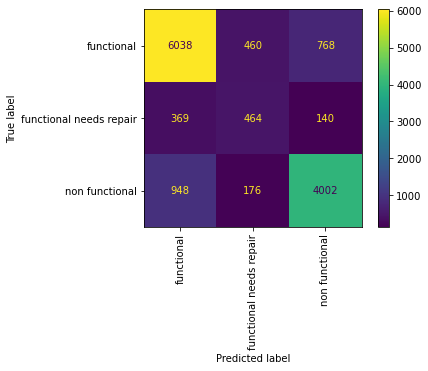

In [33]:
plot_confusion_matrix(model_pipe, X_test, y_test, xticks_rotation='vertical');

In [34]:
model_predictions(model_pipe, X_test, y_test)

The model correctly predicts 83.1% of the funtional wells.
The model correctly predicts 47.69% of the funtional-needs-repair wells.
The model correctly predicts 78.07% of the non-functional wells.


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


*  this first model is a significant improvement from the first random forest classifer model. the train score increase by $0.0736$. However, the model is still significanly overfitting and that will need to be reduced by hyperparameter tuning. 

*  the log loss also improved from about $1$ with the first model with only numeric colums to about $0.88$ with all colums included. This was an improvement of about $0.12$.

*  the total accuracy score of non-functional and functional needs repairs is $124.97$, which is better than the previous model, but there is till remove for improvement. 

# hyperparameter tuning

## the first model

*  since the training scores are severly overfitting the test scores in the data, we will first limit the max depth of the tree. this should certainly help to limit overfitting. we will leave other hyperparamters in their default state for now.

In [35]:
model_pipe_1 = imbPipeline(steps=[
    ('trans', trans),
    ('smote', SMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(verbose=1, n_jobs=-2))
])

In [36]:
model_pipe_1.get_params()

{'memory': None,
 'steps': [('trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('numerical',
                                    Pipeline(steps=[('ss', StandardScaler())]),
                                    Index(['gps_height', 'longitude', 'latitude', 'num_private', 'region_code',
          'district_code', 'population', 'construction_year'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    Index(['installer', 'basin', 'region', 'public_meeting', 'scheme_management',
          'permit', 'extraction_type', 'management', 'payment', 'water_quality',
          'quantity', 'source', 'waterpoint_type'],
         dtype='object'))],
                     verbose=True)),
  ('smote', SMOTE(random_state=42)),
  ('rfc', RandomForestClassifier(n_jobs=-2, ve

In [37]:
params = {
    'rfc__max_depth': list(range(10,100,10))
}

In [38]:
gs_1 = GridSearchCV(model_pipe_1, params, n_jobs=-2, verbose=3, cv = 2)
gs_1.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 out of  18 | elapsed:  3.2min remaining:  1.6min
[Parallel(n_jobs=-2)]: Done  18 out of  18 | elapsed:  4.0min finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:   41.9s finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['gps_height', 'longitude', 'latitude', 'num_private', 'region_code',
       'district_code', 'population', 'construction_year'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unk...
                                  

In [39]:
gs_1.score(X_train, y_train)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9945629130814316

In [40]:
gs_1.score(X_test, y_test)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7856341189674523

In [41]:
cv_1 = cross_val_score(model_pipe_1, X_train, y_train, scoring='neg_log_loss', n_jobs = -2, verbose = 3, cv = 2)
-cv_1.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   31.3s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   31.3s finished


0.8528580424974856

In [42]:
cv_1 = cross_val_score(model_pipe_1, X_test, y_test, scoring='neg_log_loss', n_jobs = -2, verbose = 1, cv = 2)
-cv_1.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:    6.5s finished


0.881934690231128

In [43]:
gs_1.best_params_

{'rfc__max_depth': 50}

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


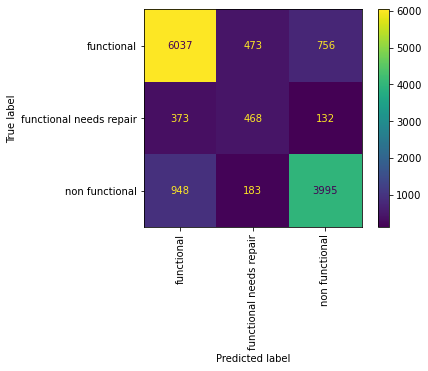

In [44]:
plot_confusion_matrix(gs_1, X_test, y_test, xticks_rotation='vertical');

In [45]:
model_predictions(gs_1, X_test, y_test)

The model correctly predicts 83.09% of the funtional wells.
The model correctly predicts 48.1% of the funtional-needs-repair wells.
The model correctly predicts 77.94% of the non-functional wells.


[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


*  this model that limited the max depth of the trees had a slighly better log loss on the test data. the accuracy scores were about the same as the previous model.

*  the total accuracy score of non-functional and functional needs repairs is $126.62$, which is a bit lower than the previous model, so now we will begin to change some more hyperparamters.

# WARNING: THESE NEXT MODELS WILL TAKE A LONG TIME TO RUN

## model 2

*  in this second iteration we will still change max depth, but will also change the number of estimators to see how a change in the number of trees would effect the accuracy score. we will also use criterion to see if it has any effect on the score of the model.

In [46]:
model_pipe_2 = imbPipeline(steps=[
    ('trans', trans),
    ('smote', SMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(verbose=1, n_jobs=-2))
])

In [47]:
params = {
    'rfc__max_depth': list(range(10,100,10)),
    'rfc__criterion': ['gini', 'entropy'],
    'rfc__n_estimators': list(range(50,250,50))   
}

In [48]:
gs_2 = GridSearchCV(model_pipe_2, params, n_jobs=-2, verbose=3, cv = 2)
gs_2.fit(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-2)]: Done 144 out of 144 | elapsed: 39.5min finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:  1.4min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['gps_height', 'longitude', 'latitude', 'num_private', 'region_code',
       'district_code', 'population', 'construction_year'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unk...
       'permit', 'extraction_type'

In [49]:
gs_2.score(X_train, y_train)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.4s finished


0.9946127946127946

In [50]:
gs_2.score(X_test, y_test)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.1s finished


0.7851103628881406

In [51]:
cv_2 = cross_val_score(model_pipe_2, X_train, y_train, scoring='neg_log_loss', n_jobs = -2, verbose = 1, cv = 2)
-cv_2.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   31.4s finished


0.8571030263463021

In [52]:
cv_2 = cross_val_score(model_pipe_2, X_test, y_test, scoring='neg_log_loss', n_jobs = -2, verbose = 1, cv = 2)
-cv_2.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:    6.4s finished


0.8874503193110341

In [53]:
gs_2.best_params_

{'rfc__criterion': 'gini', 'rfc__max_depth': 80, 'rfc__n_estimators': 200}

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.1s finished


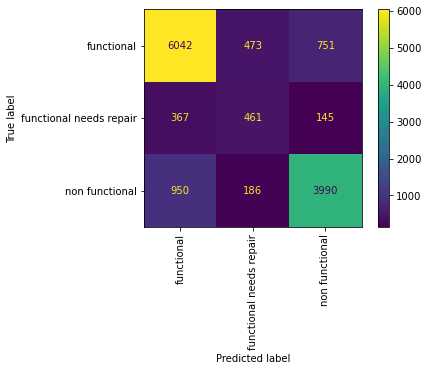

In [54]:
plot_confusion_matrix(gs_2, X_test, y_test, xticks_rotation='vertical');

In [55]:
model_predictions(gs_2, X_test, y_test)
# The model correctly predicts 91.69% of the funtional wells.
# The model correctly predicts 27.85% of the funtional-needs-repair wells.
# The model correctly predicts 73.78% of the non-functional wells.

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.1s finished


The model correctly predicts 83.15% of the funtional wells.
The model correctly predicts 47.38% of the funtional-needs-repair wells.
The model correctly predicts 77.84% of the non-functional wells.


*  this second model with more hyperparamter tuning done to it has still a better log loss on the test data, but like all previous models it is still overfitting on the training data. the accuracy scores were no better than the previous model. 

*  the total accuracy score of non-functional and functional needs repairs is $125.16$, which is similar to the previous two models, but still not the highest score. 

## model 3

in this next model we will greatly expand the hyperparamters that we are going to tune. this will allow me to see if there is any improvement in the model. 

In [56]:
model_pipe_3 = imbPipeline(steps=[
    ('trans', trans),
    ('smote', SMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(verbose=1, n_jobs=-2))
])

In [57]:
params = {
    'rfc__max_depth': list(range(10,100,10)),
    'rfc__criterion': ['gini', 'entropy'],
    'rfc__n_estimators': list(range(100,250,50)),
    'rfc__min_samples_leaf': list(range(2,12,2)),
    'rfc__min_samples_split': list(range(2,12,2)),
}

In [58]:
gs_3 = GridSearchCV(model_pipe_3, params, n_jobs=-2, verbose=3, cv = 2)
gs_3.fit(X_train, y_train)

Fitting 2 folds for each of 1350 candidates, totalling 2700 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-2)]: Done 274 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-2)]: Done 498 tasks      | elapsed: 74.0min
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed: 127.3min
[Parallel(n_jobs=-2)]: Done 1138 tasks      | elapsed: 192.6min
[Parallel(n_jobs=-2)]: Done 1554 tasks      | elapsed: 252.0min
[Parallel(n_jobs=-2)]: Done 2034 tasks      | elapsed: 342.3min
[Parallel(n_jobs=-2)]: Done 2578 tasks      | elapsed: 446.9min
[Parallel(n_jobs=-2)]: Done 2700 out of 2700 | elapsed: 468.5min finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:   53.7s finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['gps_height', 'longitude', 'latitude', 'num_private', 'region_code',
       'district_code', 'population', 'construction_year'],
      dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unk...
       'quantity', 'source', 'wate

In [59]:
gs_3.score(X_train, y_train)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.3s finished


0.9025314877166729

In [60]:
gs_3.score(X_test, y_test)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.1s finished


0.7807706696595585

In [61]:
cv_3 = cross_val_score(model_pipe_3, X_train, y_train, scoring='neg_log_loss', n_jobs = -2, verbose = 1, cv = 2)
-cv_3.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   31.3s finished


0.8725128013782077

In [62]:
cv_3 = cross_val_score(model_pipe_3, X_test, y_test, scoring='neg_log_loss', n_jobs = -2, verbose = 1, cv = 2)
-cv_3.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:    6.4s finished


0.9221941854834051

In [63]:
gs_3.best_params_

{'rfc__criterion': 'gini',
 'rfc__max_depth': 50,
 'rfc__min_samples_leaf': 2,
 'rfc__min_samples_split': 4,
 'rfc__n_estimators': 200}

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.1s finished


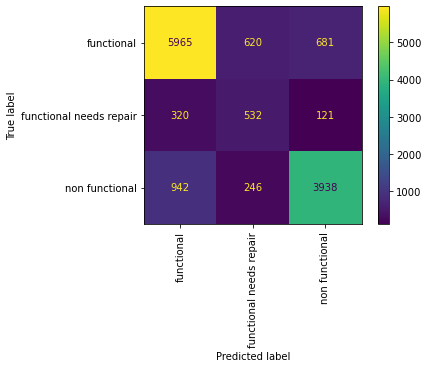

In [64]:
plot_confusion_matrix(gs_3, X_test, y_test, xticks_rotation='vertical');

In [65]:
model_predictions(gs_3, X_test, y_test)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 200 out of 200 | elapsed:    0.1s finished


The model correctly predicts 82.09% of the funtional wells.
The model correctly predicts 54.68% of the funtional-needs-repair wells.
The model correctly predicts 76.82% of the non-functional wells.


*  this model does not over fit as severly as the previous models, but still does over fit. the accuracy for the test data is no better than the other models. however, the log loss is lower than previous models, so there is some improvement in our model. the accuracy scores for function and non-functional wells are about the same, but the accuracy for functional-needs-repairs is much higher. 

*  the total accuracy score of non-functional and functional needs repairs is $131.79$, which is the best of all the random forest models. 

# model 4

here we will attempt to see if the previous model can be improved by changing some hyperparamters by hand to increase the accuracy of the test scores or to see if the predictions can be increased.

In [66]:
model_pipe_4 = imbPipeline(steps=[
    ('trans', trans),
    ('smote', SMOTE(random_state=42)),
    ('rfc', RandomForestClassifier(verbose=1, n_jobs=-2, 
                                   criterion = 'entropy',
                                   max_depth = 80,
                                   min_samples_leaf = 2,
                                   min_samples_split = 2,
                                   n_estimators = 250,
                                   class_weight='balanced'))])

In [67]:
model_pipe_4.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-2)]: Done 250 out of 250 | elapsed:  1.1min finished


Pipeline(steps=[('trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['gps_height', 'longitude', 'latitude', 'num_private', 'region_code',
       'district_code', 'population', 'construction_year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['in...lic_meeting', 'scheme_management',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type'],
      dtype='object'

In [68]:
model_pipe_4.score(X_train, y_train)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.5s finished


0.902830776904851

In [69]:
model_pipe_4.score(X_test, y_test)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.1s finished


0.7817433595211373

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.1s finished


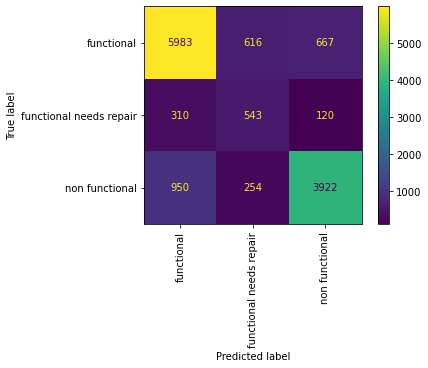

In [70]:
plot_confusion_matrix(model_pipe_4, X_test, y_test, xticks_rotation='vertical');

In [71]:
model_predictions(model_pipe_4, X_test, y_test)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 250 out of 250 | elapsed:    0.1s finished


The model correctly predicts 82.34% of the funtional wells.
The model correctly predicts 55.81% of the funtional-needs-repair wells.
The model correctly predicts 76.51% of the non-functional wells.


In [72]:
cv_4 = cross_val_score(model_pipe_4, X_train, y_train, scoring='neg_log_loss', n_jobs = -2, verbose = 1, cv = 2)
-cv_4.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   51.6s finished


0.5541534980632348

In [73]:
cv_4 = cross_val_score(model_pipe_4, X_test, y_test, scoring='neg_log_loss', n_jobs = -2, verbose = 1, cv = 2)
-cv_4.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   11.0s finished


0.6147478068023249

In [74]:
cv_5 = cross_val_score(model_pipe_4, X_train, y_train, scoring='roc_auc_ovo', n_jobs = -2, verbose = 1, cv = 2)
cv_5.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   51.9s finished


0.8755684174549365

In [75]:
cv_5 = cross_val_score(model_pipe_4, X_test, y_test, scoring='roc_auc_ovo', n_jobs = -2, verbose = 1, cv = 2)
cv_5.mean()

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 out of   2 | elapsed:   10.8s finished


0.8397927932165815

# feature importance

* here I will be checking to see the 20 most important features in our model.

In [76]:
cat_ohe_cols = model_pipe_4.named_steps['trans'].named_transformers_[
    'categorical'].named_steps['ohe'].get_feature_names(X_train_cat.columns).tolist()
cat_ohe_cols

['installer_AMREF',
 'installer_CES',
 'installer_Central government',
 'installer_Commu',
 'installer_Community',
 'installer_DANID',
 'installer_DANIDA',
 'installer_DWE',
 'installer_District Council',
 'installer_Government',
 'installer_HESAWA',
 'installer_Hesawa',
 'installer_KKKT',
 'installer_LGA',
 'installer_RWE',
 'installer_TASAF',
 'installer_TCRS',
 'installer_TWESA',
 'installer_WEDECO',
 'installer_World vision',
 'installer_other',
 'basin_Internal',
 'basin_Lake Nyasa',
 'basin_Lake Rukwa',
 'basin_Lake Tanganyika',
 'basin_Lake Victoria',
 'basin_Pangani',
 'basin_Rufiji',
 'basin_Ruvuma / Southern Coast',
 'basin_Wami / Ruvu',
 'region_Arusha',
 'region_Dar es Salaam',
 'region_Dodoma',
 'region_Iringa',
 'region_Kagera',
 'region_Kigoma',
 'region_Kilimanjaro',
 'region_Lindi',
 'region_Manyara',
 'region_Mara',
 'region_Mbeya',
 'region_Morogoro',
 'region_Mtwara',
 'region_Mwanza',
 'region_Pwani',
 'region_Rukwa',
 'region_Ruvuma',
 'region_Shinyanga',
 'region

In [77]:
num_cols = X_train_nums.columns.tolist()
num_cols

['gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [78]:
feat_cols = cat_ohe_cols + num_cols

In [79]:
important_feats = pd.Series(model_pipe_4.named_steps['rfc'].feature_importances_, 
                           index=feat_cols)

In [80]:
important_feats.sort_values(ascending=False)[:10]

installer_CES                   0.095271
installer_Central government    0.086360
source_machine dbh              0.066775
installer_DWE                   0.047928
installer_AMREF                 0.047747
installer_DANIDA                0.035922
source_other                    0.031833
installer_DANID                 0.029768
extraction_type_windmill        0.023705
installer_Community             0.022088
dtype: float64

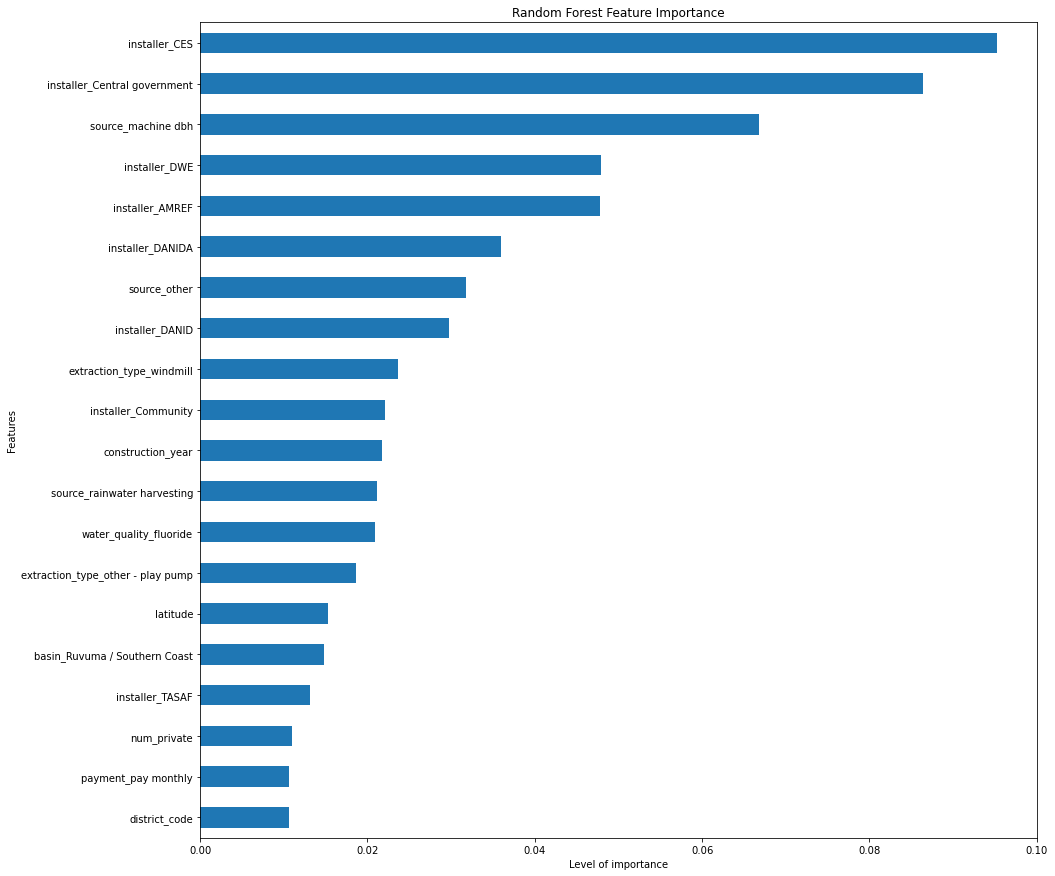

In [81]:
top_feats = important_feats.sort_values(ascending=False).head(20)
plt.figure(figsize=(15, 15))
top_feats.sort_values().plot(kind='barh')
plt.xlabel('Level of importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance');

*  using the last model, and doing some manual tuning we are able to get a train score of $0.903$, a test score of $0.781$. this model is able to correctly able to predict $82.33$% of the functional wells, $55.81$% of the functional needs repair wells, and $76.41$% of the non-functional wells. the log loss on the training data was $0.55$ and the log loss on the test data was $0.61$. the auc for the training data was $0.88$ and for the test data it was $0.84$. 

*  the total accuracy score of non-functional and functional needs repairs is $132.22$, which is the highest of all the random forest classifer models. this is the random forest model that will move foward and be compared to other models that have been made.

*  looking at the graph of feature importance we see that of the first 10 most important features 7 of them are the installer of the well. this tell us that who installed the well and how good of a job they did is very determinate of the water well status.